In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
print('GPU Unformation -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU Unformation - /device:GPU:0 

Tue Mar 23 05:37:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [3]:
import keras
keras.__version__

'2.4.3'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [7]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 23 05:38 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 23 05:38 test
drwxr-xr-x 4 root root 4096 Mar 23 05:38 train
drwxr-xr-x 4 root root 4096 Mar 23 05:38 validation


In [8]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest') # fill_mode = 사진이 변형되면서 생기는 공간을 근처값으로 채운다는

# valid는 할 필요 없어. 학습시키는 게 아니라 평가하는 데이터니까
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        7

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
%%time

# 2000장의 사진이 epoch=150번 돌 때, 총 대략 30,000장 학습하는 것과 같음. 2000장이 나올 때 generator함수에 영향을 받고, 다음 epoch로 나올 때는 (ex, [n]번째 사진이 두번째로 나오는 거니까) 또 다른 angle과 flip등으로 나올 거기 때문에.(물론 전부 0값으로 세팅될 때면 원본사진,같은 사진을 학습할 수도 있지만)/ [n]번째 사진이 150epoch동안 계속 generator함수에 영향을 받아 
Hist = model.fit(train_generator, steps_per_epoch=100, epochs=150, validation_data=valid_generator, validation_steps=50)

Epoch 1/150
100/100 [==============================] - 50s 171ms/step - loss: 0.6987 - accuracy: 0.5170 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/150
100/100 [==============================] - 17s 170ms/step - loss: 0.6945 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5080
Epoch 3/150
100/100 [==============================] - 17s 171ms/step - loss: 0.6940 - accuracy: 0.4920 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/150
100/100 [==============================] - 17s 171ms/step - loss: 0.6945 - accuracy: 0.4814 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/150
100/100 [==============================] - 17s 172ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 6/150
100/100 [==============================] - 17s 174ms/step - loss: 0.6873 - accuracy: 0.5471 - val_loss: 0.6827 - val_accuracy: 0.5480
Epoch 7/150
100/100 [==============================] - 17s 171ms/step - loss: 0.6829 - accuracy: 0.5709 - val_loss: 0.6847 -

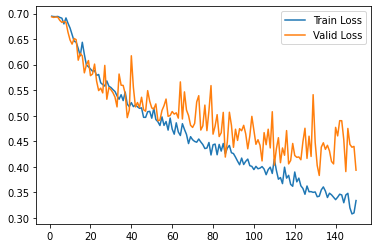

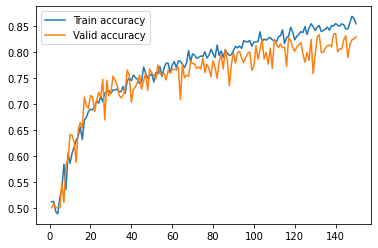

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss','Valid Loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy','Valid accuracy'])
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
loss, accuracy = model.evaluate(test_generator, steps=50)
loss, accuracy

50/50 [==============================] - 3s 53ms/step - loss: 0.4818 - accuracy: 0.7990


(0.48182952404022217, 0.7990000247955322)

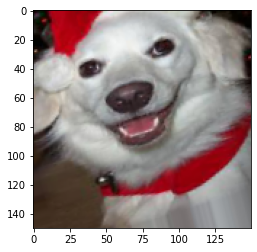

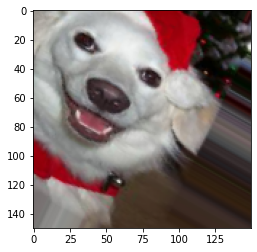

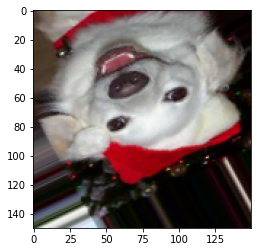

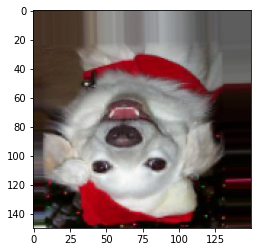

In [20]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')

from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_dogs_dir = train_dir = os.path.join('train','dogs')
fnames = sorted([os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)])

img_path = fnames[77]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 ==0:
    break

plt.show()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_dogs_cats_augmentation.h5')

In [23]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 20881
-rw------- 1 root root    34592 Mar 17 07:49 001_model_iris.h5
-rw------- 1 root root 21346912 Mar 23 06:31 003_dogs_cats_augmentation.h5
